In [71]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalizar
            images.append(img_array)
            labels.append(label)
    return images, labels

In [74]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)


# Directorios para train
train_monitor_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/monitor/train"
train_mouse_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/mouse/train"
train_keyboard_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/keyboard/train"

# Cargar imágenes de train
monitor_images, monitor_labels = load_images_from_folder(train_monitor_dir, 0)
mouse_images, mouse_labels = load_images_from_folder(train_mouse_dir, 1)
keyboard_images, keyboard_labels = load_images_from_folder(train_keyboard_dir, 2)

# Concatenar todas las imágenes y etiquetas
train_images = np.array(monitor_images + mouse_images + keyboard_images)
train_labels = np.array(monitor_labels + mouse_labels + keyboard_labels)

# Convertir en dataset de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)

In [75]:
# Directorios para test
test_monitor_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/monitor/test"
test_mouse_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/mouse/test/"
test_keyboard_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/keyboard/test"

# Cargar imágenes de test
monitor_images, monitor_labels = load_images_from_folder(test_monitor_dir, 0)
mouse_images, mouse_labels = load_images_from_folder(test_mouse_dir, 1)
keyboard_images, keyboard_labels = load_images_from_folder(test_keyboard_dir, 2)


# Concatenar todas las imágenes y etiquetas
test_images = np.array(monitor_images + mouse_images + keyboard_images)
test_labels = np.array(monitor_labels + mouse_labels + keyboard_labels)

# Convertir en dataset de TensorFlow
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [76]:
# Directorios para val
val_monitor_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/monitor/val"
val_mouse_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/mouse/val"
val_keyboard_dir = "/content/drive/Shareddrives/I.A. para Ciencia de Datos/actividad_monitores_teclados_mouse/images/keyboard/val"

# Cargar imágenes de val
monitor_images, monitor_labels = load_images_from_folder(val_monitor_dir, 0)
mouse_images, mouse_labels = load_images_from_folder(val_mouse_dir, 1)
keyboard_images, keyboard_labels = load_images_from_folder(val_keyboard_dir, 2)

# Concatenar todas las imágenes y etiquetas
val_images = np.array(monitor_images + mouse_images + keyboard_images)
val_labels = np.array(monitor_labels + mouse_labels + keyboard_labels)

# Convertir en dataset de TensorFlow
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.shuffle(buffer_size=len(val_images)).batch(BATCH_SIZE)



In [96]:
# Revisando las clases del dataset de train
for image, label in train_dataset.take(1):
    print(image.shape)
    print(label.shape)
    print(label.numpy())

# Revisando las clases del dataset de test
for image, label in test_dataset.take(1):
    print(image.shape)
    print(label.shape)
    print(label.numpy())

# Revisando las clases del dataset de val
for image, label in val_dataset.take(1):
    print(image.shape)
    print(label.shape)
    print(label.numpy())




(32, 160, 160, 3)
(32,)
[1 1 1 2 0 0 1 2 0 2 1 1 1 2 1 2 1 1 2 0 0 0 0 2 1 2 2 0 1 1 2 1]
(32, 160, 160, 3)
(32,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32,160,160,3] and element 4 had shape [23,160,160,3]. [Op:IteratorGetNext] name: 

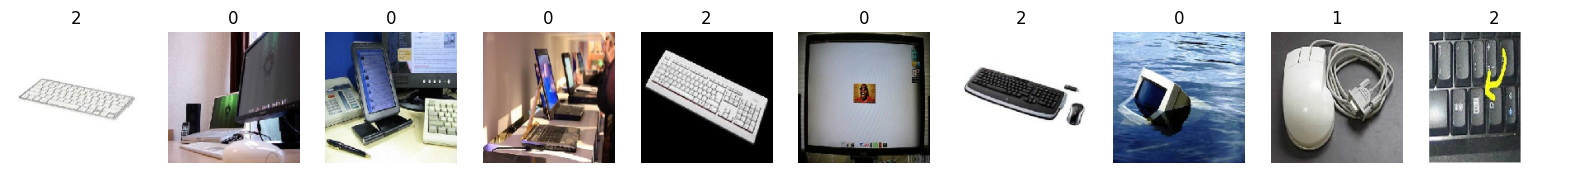

In [78]:
# Imprimir imagenes
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for image, label in val_dataset.take(1):
    for i in range(10):
        axes[i].imshow(image[i])
        axes[i].set_title(label[i].numpy())
        axes[i].axis("off")
plt.show()

In [79]:
#Preprocesado de dataset
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input



In [80]:
# IMPRIMIR TAMAÑO DE IMAGEN
for image, label in train_dataset.take(1):
    print(image.shape)



(32, 160, 160, 3)


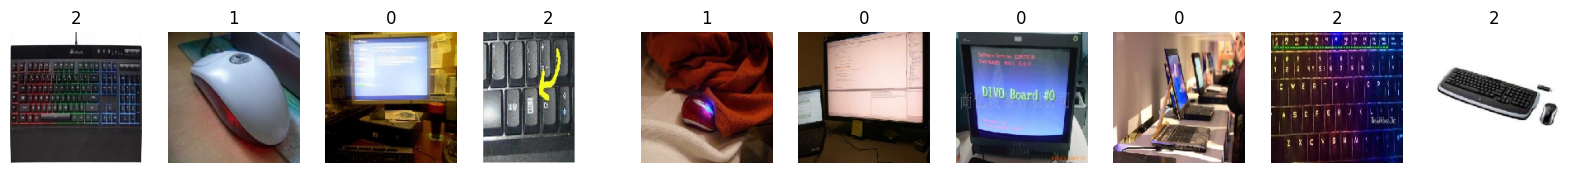

In [93]:
# Imprimir imagenes
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for image, label in val_dataset.take(1):
    for i in range(10):
        axes[i].imshow(image[i])
        axes[i].set_title(label[i].numpy())
        axes[i].axis("off")
plt.show()

In [82]:
#CARGA RED MOBILENET V2

IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetV2S(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)


In [83]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [84]:
base_model.trainable = False
base_model.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_5 (Rescaling)   │ (None, 160, 160, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 80, 80, 24)     │            648 │ rescaling_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 80, 80, 24)     │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 80, 80, 24)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 80, 80, 24)     │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 80, 80, 24)     │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 80, 80, 24)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 80, 80, 24)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 80, 80, 24)     │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 80, 80, 24)     │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 80, 80, 24)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 80, 80, 24)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 80, 80, 24)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├──────────────────────

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,331,360 (77.56 MB)

In [85]:
#Configurar clasificador
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

# Capa de prediccion para 3 clases
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1280)
(32, 3)


In [86]:
#Unir los modelos
inputs = tf.keras.Input(shape=(160,160,3))
x=preprocess_input(inputs)
x=base_model(x, training=False)
x=global_average_layer(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=prediction_layer(x)
model=tf.keras.Model(inputs,outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_2 (TrueDivide)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_2 (Subtract)                │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 5, 5, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,335,203 (77.57 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [87]:
len(model.trainable_variables)

2

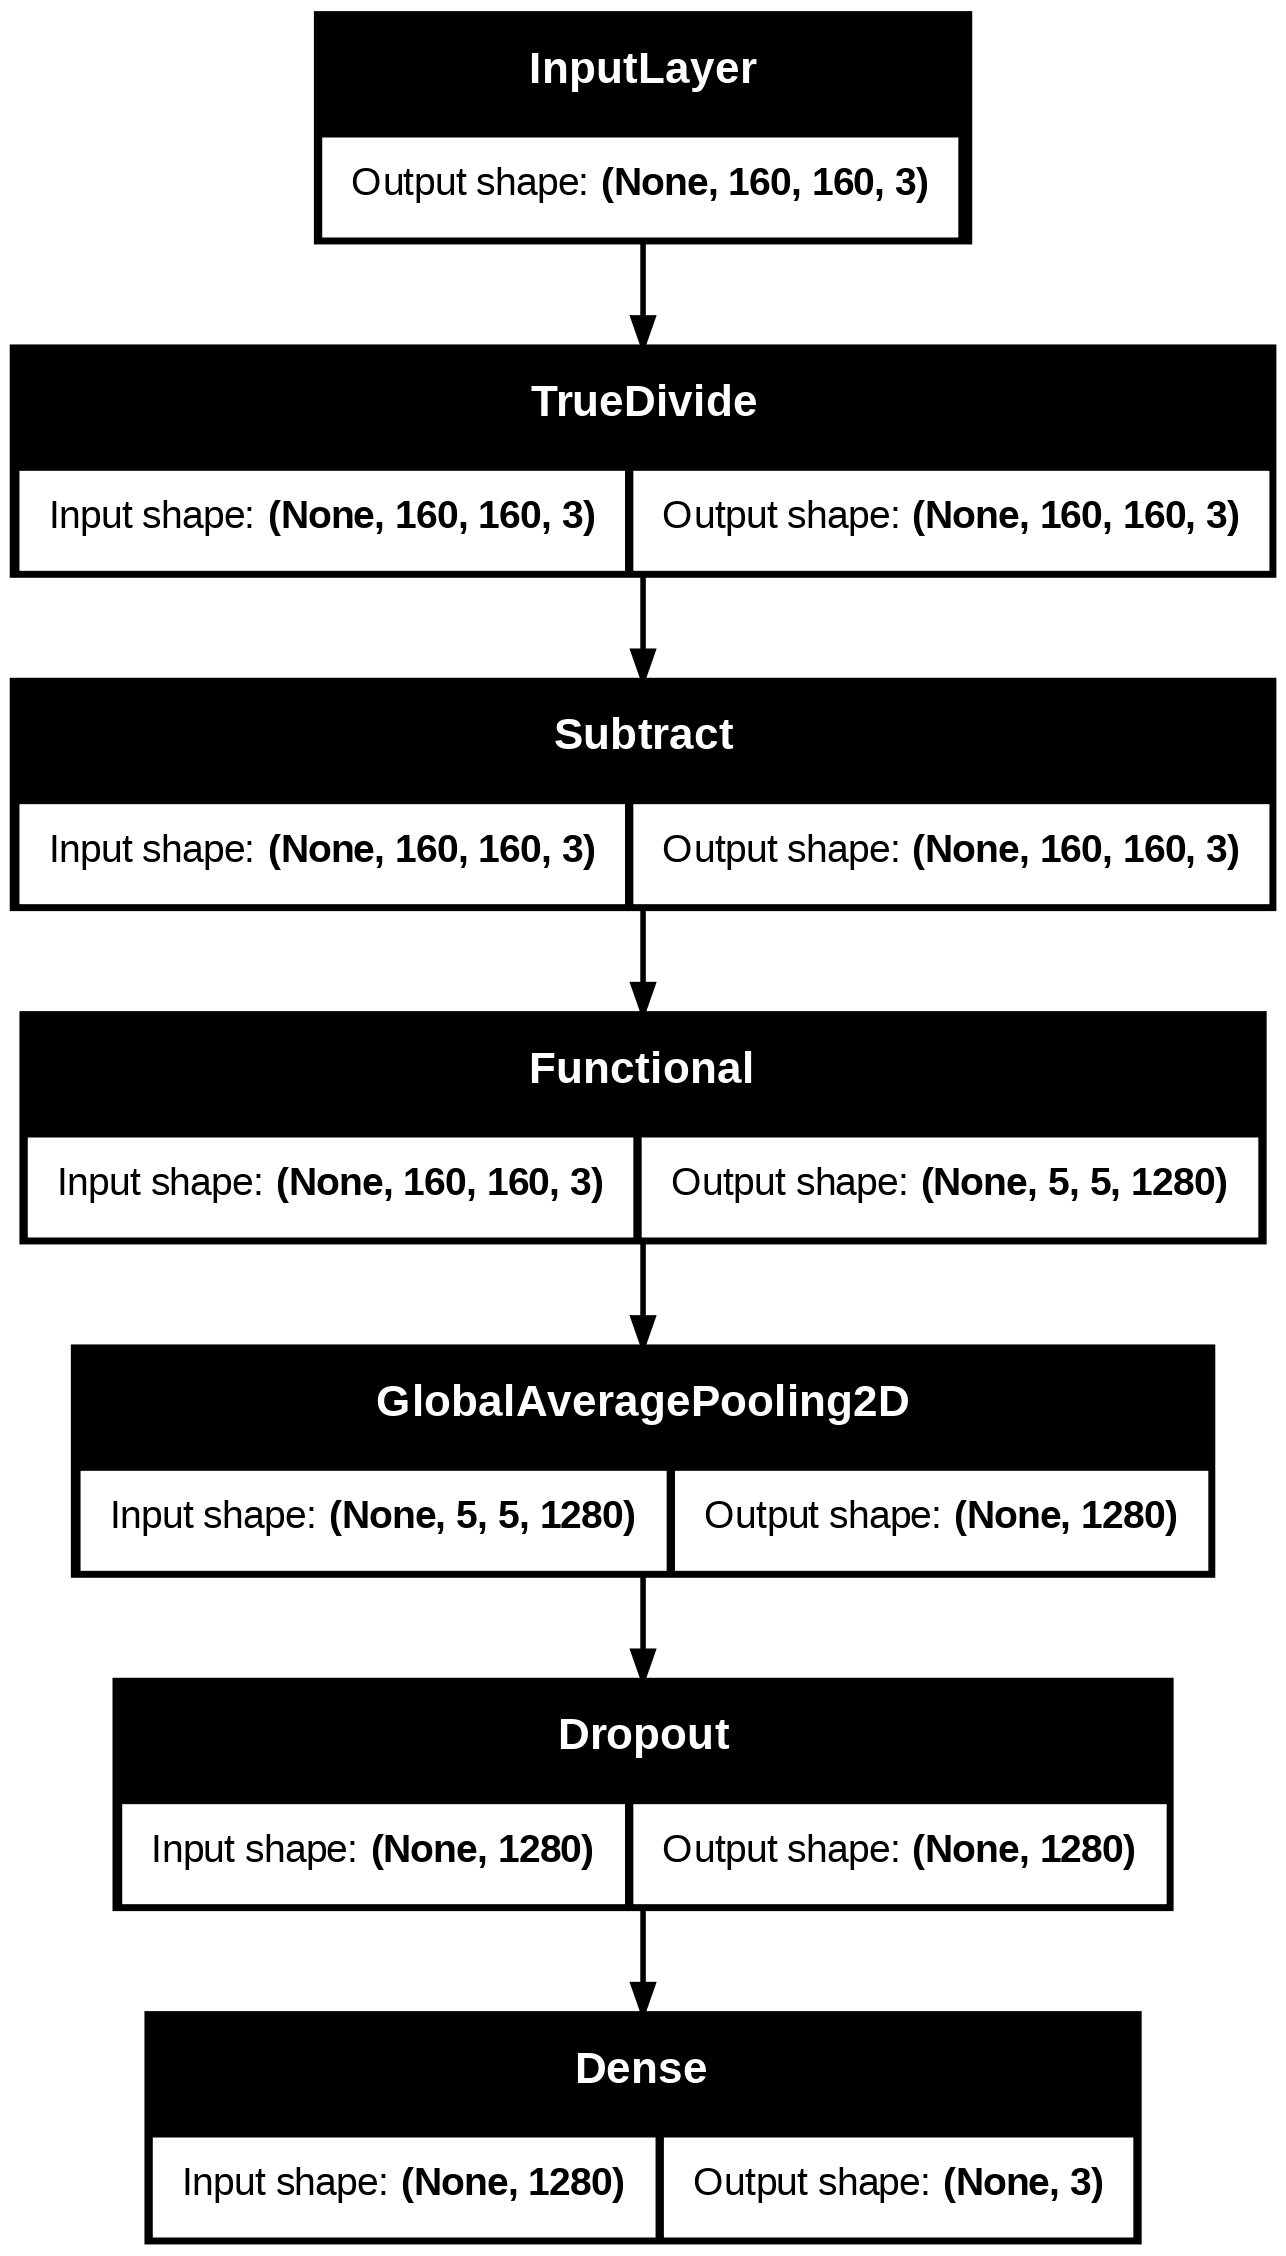

In [88]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [89]:
#Compilacion del modelo
base_learning_rate = 0.005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
#Evaluacion del modelo original
loss0, accuracy0 = model.evaluate(validation_dataset)

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 889ms/step - accuracy: 0.3462 - loss: 1.1038


In [91]:
#Entrenamiento inicial del modelo
initial_epochs = 10

history=model.fit(train_dataset,
                 epochs=initial_epochs,
                 validation_data=validation_dataset)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 75s 512ms/step - accuracy: 0.4908 - loss: 1.0565 - val_accuracy: 0.3333 - val_loss: 1.1708
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.5338 - loss: 1.0308 - val_accuracy: 0.3333 - val_loss: 1.1938
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5359 - loss: 1.0280 - val_accuracy: 0.3333 - val_loss: 1.1850
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5434 - loss: 1.0250 - val_accuracy: 0.3333 - val_loss: 1.1883
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5154 - loss: 1.0407 - val_accuracy: 0.3333 - val_loss: 1.1613
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5148 - loss: 1.0424 - val_accuracy: 0.3333 - val_loss: 1.1910
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5374 - loss: 1.0502 - val_accuracy: 0.3333 - val_loss: 1.1939
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5272 - loss: 1.0334 - val_accuracy: 0.3333 

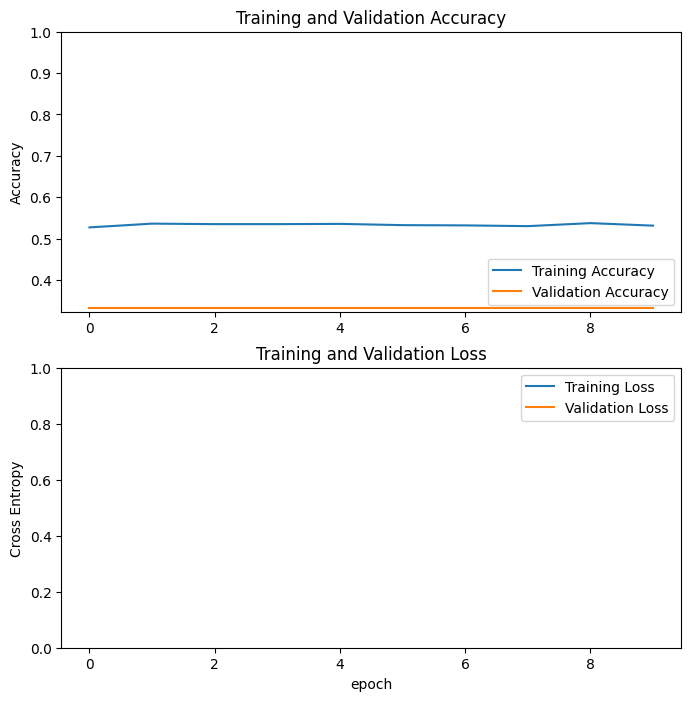

In [92]:
#Graficar el historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

FINE TUNNING

In [61]:
base_model.trainable = True

len(base_model.layers)

513

In [62]:
fine_tuning_at = 400

for layer in base_model.layers[:fine_tuning_at]:
    layer.trainable = False



In [66]:
#compilacion del modelo
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Changed to CategoricalCrossentropy
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_1 (TrueDivide)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_1 (Subtract)                │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 5, 5, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,335,203 (77.57 MB)

 Trainable params: 7,763,651 (29.62 MB)

 Non-trainable params: 12,571,552 (47.96 MB)

In [64]:
len(model.trainable_variables)

99

In [67]:
#Continuar el entrenamiento
fine_tuning_epochs = 10
total_epochs =  initial_epochs + fine_tuning_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)


Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4569 - loss: 1.0923 - val_accuracy: 0.3333 - val_loss: 1.1270
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5400 - loss: 1.0241 - val_accuracy: 0.3333 - val_loss: 1.1123
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5404 - loss: 1.0203 - val_accuracy: 0.3333 - val_loss: 1.2030
Epoch 13/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5350 - loss: 1.0228 - val_accuracy: 0.3333 - val_loss: 1.1600
Epoch 14/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5567 - loss: 1.0041 - val_accuracy: 0.3333 - val_loss: 1.1238
Epoch 15/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5340 - loss: 1.0207 - val_accuracy: 0.3333 - val_loss: 1.2140
Epoch 16/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5283 - loss: 1.0253 - val_accuracy: 0.3333 - val_loss: 1.1767
Epoch 17/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5244 - loss: 1.0337 - val_accuracy: 0.

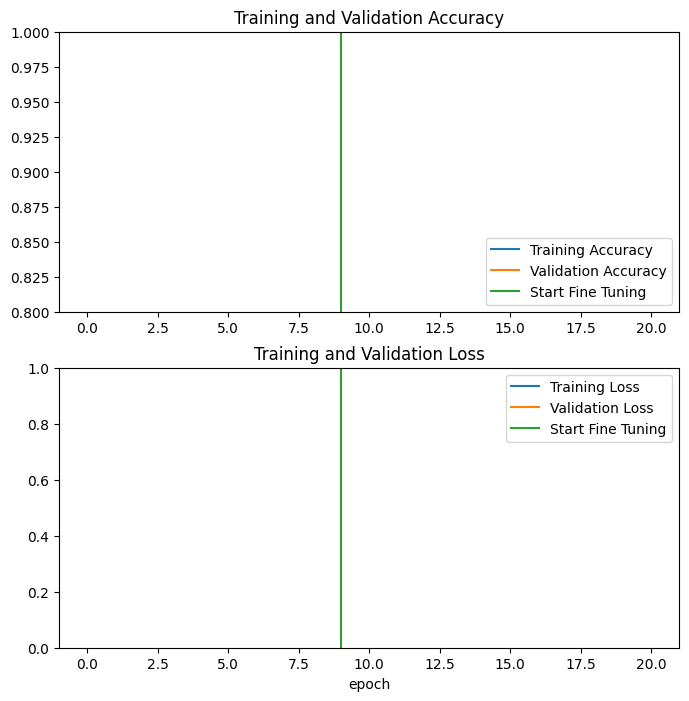

In [68]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2766 - loss: 1.1634
Test accuracy : 0.3333333432674408
Predictions:
 [0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


NameError: name 'class_names' is not defined

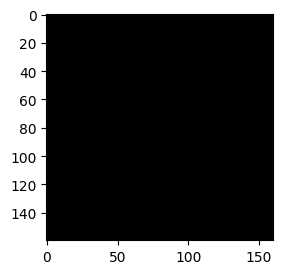

In [70]:
#Inferencia
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

#inferencia de una imagen

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

#aplicar una sigmoide
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

# Imprimir la imagen
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")
    plt.show()

